In [34]:
import jax.numpy as jnp

import pandas as pd

import make_df

import matplotlib.pyplot as plt

In [35]:
def fun(x):
    return (x[:,0]**2 + x[:,1] - 11)**2 / 800.0 + (x[:,0] + x[:,1]**2 -7)**2 / 800.0

In [36]:
# sparsification
sparse = False
mode = "rand"
subset_size = 0.005
sparse_dict = {0.1: "log_sparse_0_1", 0.02: "log_sparse_0_02", 0.3: "log_sparse_0_3", 0.005: "log_sparse_0_005"}

if sparse:
    # directory where to save stuff
    in_dir = f"./sparse/{mode}/{sparse_dict[subset_size]}"

    # How many derivative observations should be chosen
    list_d_vals = [200, 400, 800, 1500, 2000, 3000]
else:
    # directory where to save stuff
    in_dir = "./full"
    # How many derivative observations should be chosen
    list_d_vals = [5, 20, 50, 100, 200, 400, 800]


# optimizer type
optimizers = ["L-BFGS-B", "TNC", "SLSQP"]

# name of the function
name = "him"

# How many function observations should be chosen
list_f_vals = [1, 5, 20, 50]

# Grid on which to evaluate the function
bounds = jnp.array([[-5.0, -5.0], [5.0, 5.0]])
eval_grid = jnp.linspace(bounds[0], bounds[1],100).T
eval_grid = jnp.array(jnp.meshgrid(*eval_grid)).reshape(2,-1).T

In [37]:
data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)

In [38]:
data.head(5)

,f,d,opt,mses,maxerrs,maxstds,true_in_confs,mean_mse,median_mse,max_mse,min_mse,mean_tic,max_tic,min_tic
0,1,5,L-BFGS-B,"[0.051850986, 0.13091764, 0.021417916, 0.12229...","[1.0609524, 1.4933075, 0.931641, 0.75121254, 1...","[0.0639611, 0.67035174, 0.008038823, 0.7376506...","[0.66679996, 0.5819, 0.4965, 0.68009996, 0.4816]",0.118188076,0.12229612,0.2644577,0.021417916,0.58138,0.68009996,0.4816
1,1,5,TNC,"[0.05365582, 0.18239835, 0.27307472, 0.0694865...","[1.1119933, 1.1478299, 1.6217415, 0.9758515, 0...","[0.012618531, 0.36427128, 0.37711298, 0.096622...","[0.3796, 0.6868, 0.3234, 0.6392, 0.5017]",0.12001894,0.06948657,0.27307472,0.021479214,0.50614,0.6868,0.3234
2,1,5,SLSQP,"[0.0573229, 0.052826237, 0.08922722, 0.0871788...","[1.1030152, 1.1131817, 0.75671506, 0.8345957, ...","[0.16595104, 0.0009179499, 0.273201, 0.1971531...","[0.7758, 0.1068, 0.668, 0.7474, 0.2792]",0.13343678,0.0871788,0.3806287,0.052826237,0.51544,0.7758,0.1068
3,1,20,L-BFGS-B,"[0.22603095, 0.15856822, 0.05564828, 0.0518689...","[1.0827676, 1.0713034, 1.1347184, 0.51950747, ...","[0.095777735, 0.19455662, 0.029660953, 0.08571...","[0.1443, 0.17799999, 0.3821, 0.4633, 0.60139996]",0.10939973,0.05564828,0.22603095,0.05186892,0.35382,0.60139996,0.1443
4,1,20,TNC,"[0.053936463, 0.1447266, 0.052390564, 0.077923...","[0.8173574, 1.0360918, 1.1125, 1.1586462, 0.78...","[0.08794376, 0.10279536, 0.001, 0.11506562, 0....","[0.47309998, 0.37579998, 0.1118, 0.45839998, 0...",0.0719528,0.053936463,0.1447266,0.030786425,0.4344,0.7529,0.1118


Text(0, 0.5, 'MSE')

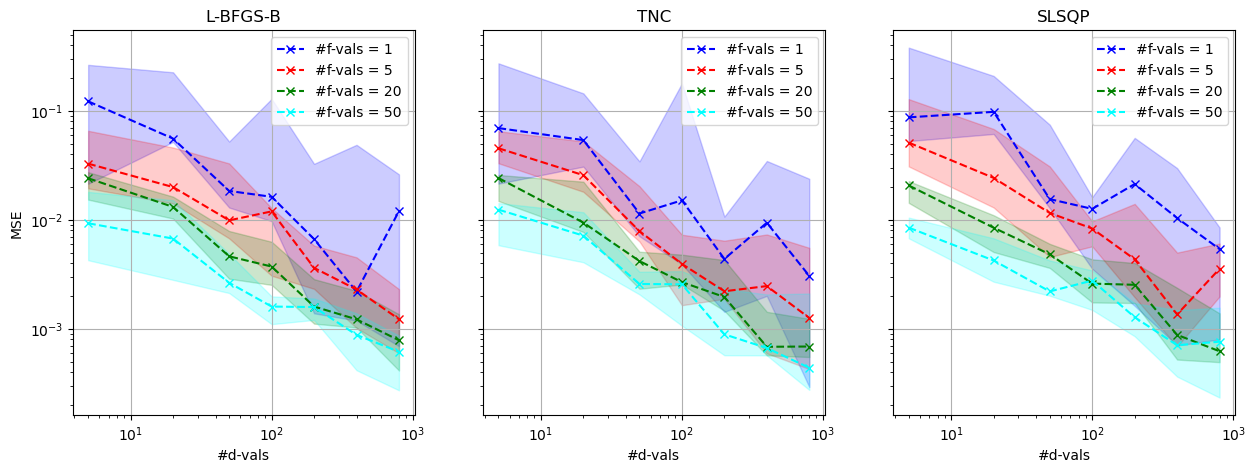

In [39]:
colors = ["b", "r", "g", "cyan"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, optimizer in enumerate(optimizers):
    opt_data = data[data["opt"] == optimizer]
    for c,f in zip(colors, opt_data["f"].unique()):
        temp = opt_data[opt_data["f"] == f]
        dvals = temp["d"]

        # mean_mse = temp["mean_mse"]
        median_mse = temp["median_mse"]
        min_mse = temp["min_mse"]
        max_mse = temp["max_mse"]
        # ax[i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[i].plot(dvals, median_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[i].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
        ax[i].set_yscale("log")
        ax[i].set_xscale("log")


    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel("#d-vals")
    ax[i].set_title(optimizer)

ax[0].set_ylabel("MSE")

Text(0, 0.5, '% Y inside conf.-interval')

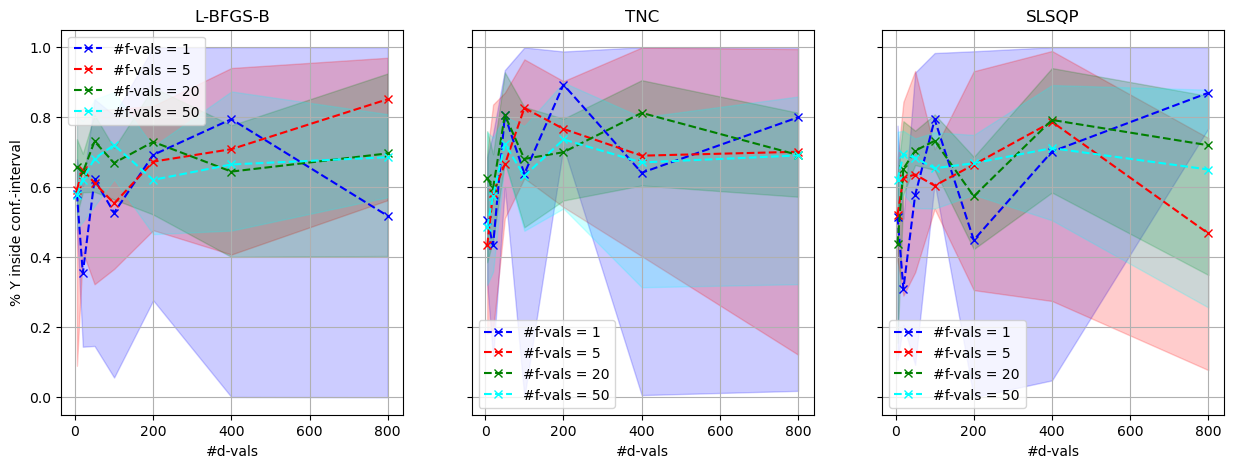

In [40]:
colors = ["b", "r", "g", "cyan"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, optimizer in enumerate(optimizers):
    opt_data = data[data["opt"] == optimizer]
    for c,f in zip(colors, opt_data["f"].unique()):
        temp = opt_data[opt_data["f"] == f]
        dvals = temp["d"]

        mean_tic = temp["mean_tic"]
        min_tic = temp["min_tic"]
        max_tic = temp["max_tic"]
        ax[i].plot(dvals, mean_tic, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[i].fill_between(dvals, min_tic.tolist(), max_tic.tolist(), color=c, alpha=0.2)


    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel("#d-vals")
    ax[i].set_title(optimizer)
ax[0].set_ylabel("% Y inside conf.-interval")

## Comparison between different sparsifications

FileNotFoundError: [Errno 2] No such file or directory: './sparse/rand/log_sparse_0_005/him_d5_f1_SLSQP_sparse0.005_means.npz'

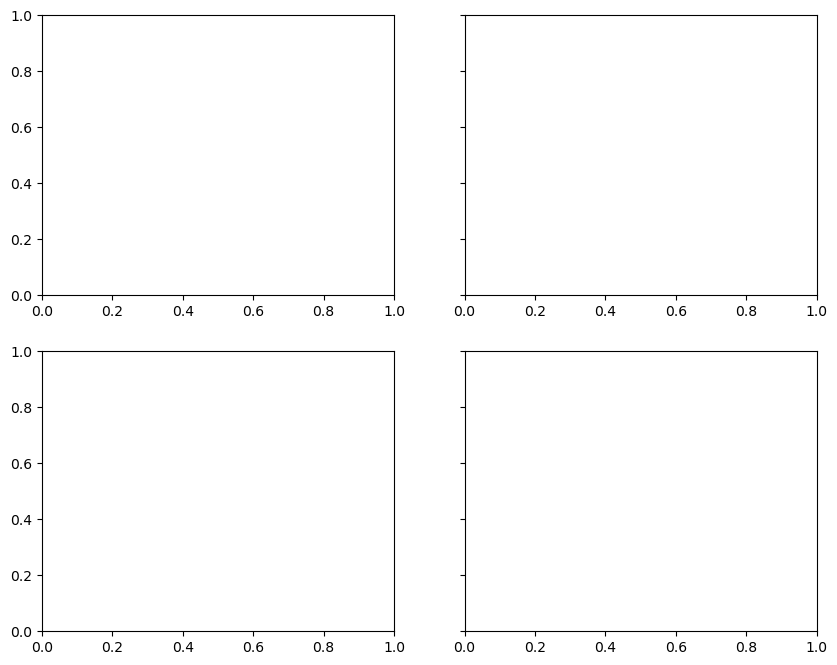

In [41]:
colors = ["b", "r", "g", "cyan"]

fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

sparse_list = [[0.005, 0.02], [0.1, 0.3]]
optimizers = ["SLSQP"]

for i, elem in enumerate(sparse_list):
    for j, sparse in enumerate(elem):
        in_dir = f"./sparse/{mode}/{sparse_dict[sparse]}"
        data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, True, sparse_dict[sparse], fun, eval_grid)
        opt_data = data[data["opt"] == optimizers[0]]
        for c,f in zip(colors, opt_data["f"].unique()):
            temp = opt_data[opt_data["f"] == f]
            dvals = temp["d"]

            # mean_mse = temp["mean_mse"]
            median_mse = temp["median_mse"]
            min_mse = temp["min_mse"]
            max_mse = temp["max_mse"]
            # ax[i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
            ax[i,j].plot(dvals, median_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
            ax[i,j].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
            ax[i,j].set_yscale("log")
            ax[i,j].set_xscale("log")


        ax[i,j].grid()
        # ax[i,j].legend()
        ax[i,j].set_title(sparse)

ax[1,0].set_xlabel("#d-vals")
ax[1,1].set_xlabel("#d-vals")
ax[0,0].set_ylabel("MSE")
ax[1,0].set_ylabel("MSE")
fig.suptitle("MSE over training set size for different sparsification")
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncols=4)